In [1]:
import CNN_Model as cnn

#### 1. Define the path for labeled training data

In [2]:
DATASET = ['Nyquist/Noisy', 'Nyquist/SingleHump', 'Nyquist/TwoHumps', 'Nyquist/Tail', 'testing_outputfile.npy']
DATASET

['Nyquist/Noisy',
 'Nyquist/SingleHump',
 'Nyquist/TwoHumps',
 'Nyquist/Tail',
 'testing_outputfile.npy']

#### 2. Call the EIS.DataImport class

In [3]:
self = cnn.EISDataImport

#### 3. Use the Build_Data function to import the data(image)
* Define which type of data to import (Training/Predict)
* Define how many type of the training data or how many folders/paths of the predicted data
* Define the target image size after resize 

In [4]:
cnn.Build_Data(True, False, 4, DATASET, 800, 536)

Nyquist/Noisy


100%|████████████████████████████████████████████████████████████████████████████████| 197/197 [00:02<00:00, 82.08it/s]


Nyquist/SingleHump


100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [00:02<00:00, 82.41it/s]


Nyquist/TwoHumps


100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [00:02<00:00, 81.21it/s]


Nyquist/Tail


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:02<00:00, 76.98it/s]


Nyquist/Noisy : 196
Nyquist/SingleHump : 198
Nyquist/TwoHumps : 198
Nyquist/Tail : 195


#### 4. Load the array-form data from the .npy file

In [5]:
training_data = cnn.load_array_data('testing_outputfile.npy')

#### 5. Print out the data (image) information

In [6]:
cnn.data_information(training_data)

Type of input_data: <class 'numpy.ndarray'>
Size of imput_data: 787
Size of image(after rescale): 800 x 536


#### 6. Check the array-form data
* Plot the image to check if it's sucessfully imported the program.
* Check the image remain the feature after resize

Nyquist/SingleHump\200315-0315_sim_spread.png


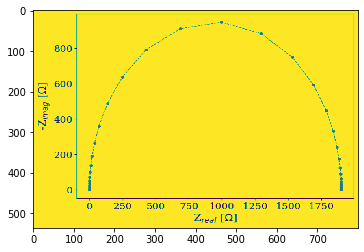

In [7]:
cnn.plotting_data(training_data, 1)

#### 7. Call the Net class a.k.a. Convolutional Neural Network model

In [8]:
cnn.Net(1, 800, 536, 8, 5, 4)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=85376, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=4, bias=True)
)

#### 8. Transform the array-form data into tensor form

In [9]:
tensor_image = cnn.image_to_tensor(training_data, 800, 536)

In [10]:
tensor_type = cnn.type_to_tensor(training_data)

#### 9. Separating the training sample and testing sample
* training_sample_image
* training_sample_type
* testing_sample_image
* testing_sample_type

In [11]:
training_sample_image = cnn.data_separation(tensor_image, 0.2, True, False)

Training Samples: 630


In [12]:
training_sample_type = cnn.data_separation(tensor_type, 0.2, True, False)

Training Samples: 630


In [13]:
testing_sample_image = cnn.data_separation(tensor_image, 0.2, False, True)

Testing Samples: 157


In [14]:
testing_sample_type = cnn.data_separation(tensor_type, 0.2, False, True)

Testing Samples: 157


#### 10. Use the learning function to check the loss

In [15]:
cnn.learning(training_sample_image, training_sample_type, 1, 800, 536, 8, 5, 4, 0.001, 10, 3)

100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [05:00<00:00,  4.77s/it]


tensor(0.1961, grad_fn=<MseLossBackward>)


100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [04:55<00:00,  4.69s/it]


tensor(0.4406, grad_fn=<MseLossBackward>)


100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [04:52<00:00,  4.64s/it]


tensor(0.1939, grad_fn=<MseLossBackward>)


#### 11. Use the accuracy function to check the accuracy

In [16]:
cnn.accuracy(testing_sample_image, testing_sample_type, 1, 800, 536, 8, 5, 4)

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:22<00:00,  1.10it/s]


Accuracy: 0.268


0.268

### The following step is importing random (unlabeled) data into the Neural Network Nodel 
*Try to get the prediction result from the model*

In [17]:
PREDICT = ['Nyquist/Random','predicting.npy']
PREDICT

['Nyquist/Random', 'predicting.npy']

In [18]:
cnn.Build_Data(False, True, 1, PREDICT, 800, 536)

Nyquist/Random


100%|████████████████████████████████████████████████████████████████████████████████| 141/141 [00:01<00:00, 77.26it/s]


Nyquist/Random : 140


In [19]:
random_data = cnn.load_array_data('predicting.npy')

In [20]:
cnn.data_information(random_data)

Type of input_data: <class 'numpy.ndarray'>
Size of imput_data: 140
Size of image(after rescale): 800 x 536


Nyquist/Random\200315-0492_sim_spread.png


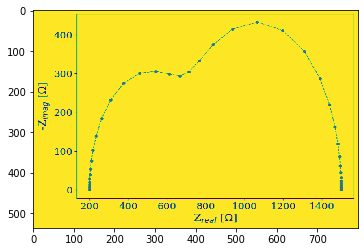

In [22]:
cnn.plotting_data(random_data, 1)

In [23]:
tensor_image = cnn.image_to_tensor(random_data, 800, 536)

In [25]:
cnn.type_prediction(4, DATASET, tensor_image, random_data, 1, 800, 536, 8, 5, 4, True, 15)

Type Prediction: Nyquist/SingleHump
Path and File Name Nyquist/Random\200315-0104_sim_one.png
Type Prediction: Nyquist/Noisy
Path and File Name Nyquist/Random\200315-0492_sim_spread.png
Type Prediction: Nyquist/Noisy
Path and File Name Nyquist/Random\200315-0359_sim_spread.png
Type Prediction: Nyquist/SingleHump
Path and File Name Nyquist/Random\200315-0107_sim_one.png
Type Prediction: Nyquist/TwoHumps
Path and File Name Nyquist/Random\200315-0119_sim_one.png
Type Prediction: Nyquist/TwoHumps
Path and File Name Nyquist/Random\200315-0127_randles_simp.png
Type Prediction: Nyquist/SingleHump
Path and File Name Nyquist/Random\200315-0139_randles_simp.png
Type Prediction: Nyquist/TwoHumps
Path and File Name Nyquist/Random\200315-0363_sim_spread.png
Type Prediction: Nyquist/SingleHump
Path and File Name Nyquist/Random\200315-0138_sim_one.png
Type Prediction: Nyquist/TwoHumps
Path and File Name Nyquist/Random\200315-0024_sim_one-True.png
Type Prediction: Nyquist/Noisy
Path and File Name Nyqu